In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
train_dir = "OA/TRAIN"
test_dir = "OA/TEST"

In [4]:

img_width, img_height = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1486 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [5]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()


C:\Users\shyam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

C:\Users\shyam\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5608 - loss: 0.7067

C:\Users\shyam\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5624 - loss: 0.7048 - val_accuracy: 0.6691 - val_loss: 0.5814
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 44s 938ms/step - accuracy: 0.7547 - loss: 0.5163 - val_accuracy: 0.8382 - val_loss: 0.3943
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8118 - loss: 0.4099 - val_accuracy: 0.7966 - val_loss: 0.4188
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8209 - loss: 0.3885 - val_accuracy: 0.8578 - val_loss: 0.3440
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8375 - loss: 0.3760 - val_accuracy: 0.8775 - val_loss: 0.3337
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8510 - loss: 0.3512 - val_accuracy: 0.7549 - val_loss: 0.4989
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8251 - loss: 0.3925 - val_accuracy: 0.8578 - val_loss: 0.3425
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8546 - loss: 0.3693 - val_accuracy: 0.8824 - val_loss: 0.3219


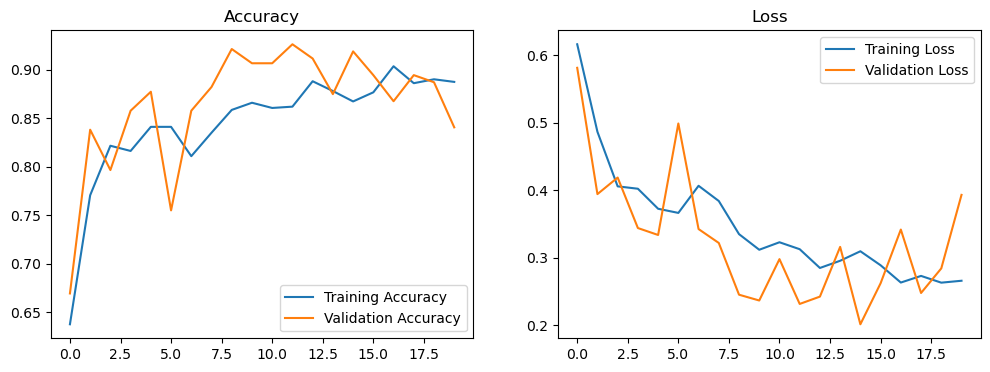

In [7]:

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [10]:
from sklearn.metrics import classification_report, confusion_matrix


In [13]:

!pip install seaborn


In [15]:
import seaborn as sns


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.9080 - loss: 0.2025
Test Loss: 0.20140476524829865
Test Accuracy: 0.9191176295280457
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step

Classification Report:

              precision    recall  f1-score   support

      Caries       0.52      0.54      0.53       204
  Gingivitis       0.52      0.50      0.51       204

    accuracy                           0.52       408
   macro avg       0.52      0.52      0.52       408
weighted avg       0.52      0.52      0.52       408



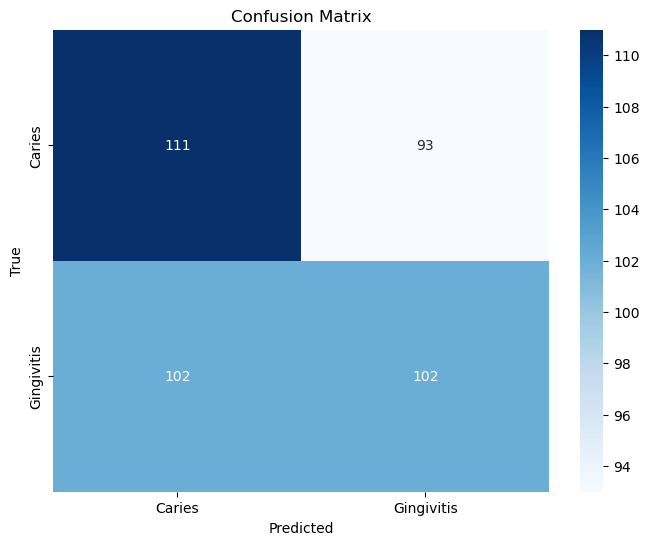

In [16]:

loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes


class_labels = list(test_generator.class_indices.keys())
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
model.save("oral_disease_classifier.h5")

In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt

In [2]:

model = load_model("oral_disease_classifier.keras")


test_dir = "OA/TEST"
class_labels = sorted(os.listdir(test_dir))  


def predict_image(image_path, model, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(128, 128))  
    img_array = img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  

   
    predictions = model.predict(img_array)
    predicted_class = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions)

    return predicted_class, confidence, img

C:\Users\shyam\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


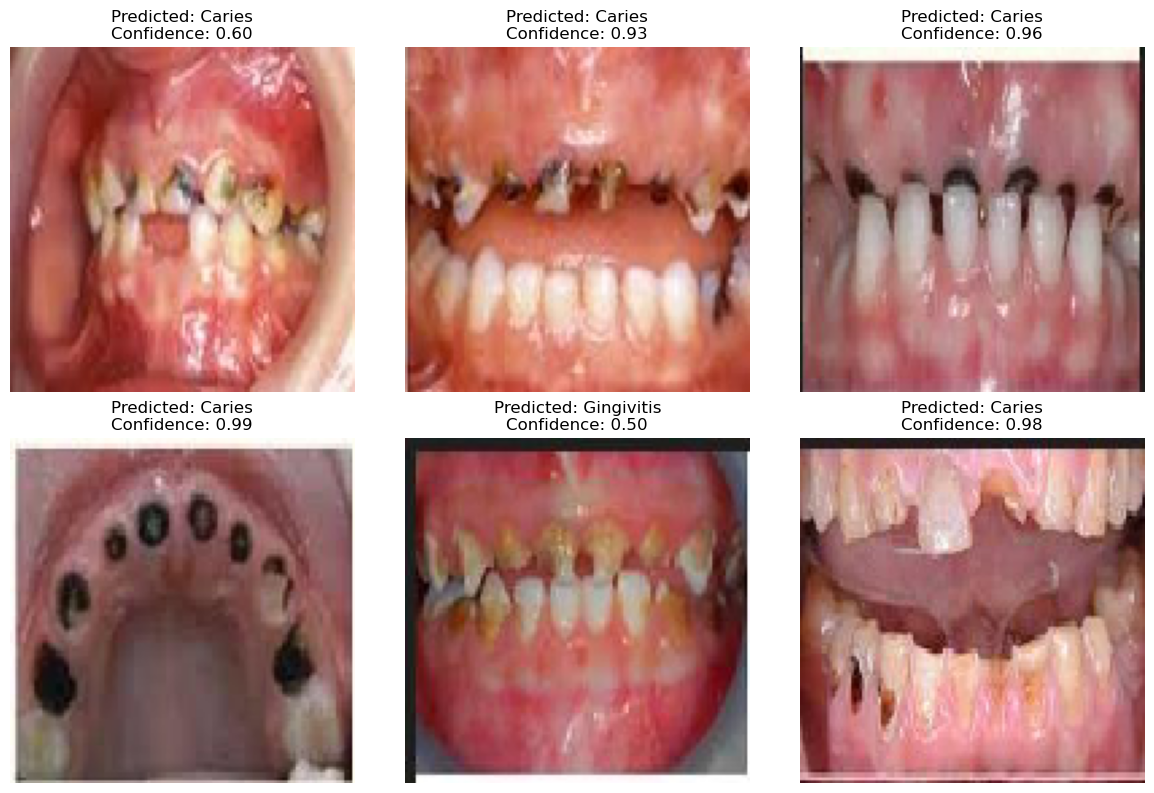

In [3]:
test_images = []
for class_folder in class_labels:
    class_folder_path = os.path.join(test_dir, class_folder)
    test_images.extend([os.path.join(class_folder_path, img) for img in os.listdir(class_folder_path) if img.endswith(('.jpg', '.png', '.jpeg'))])


plt.figure(figsize=(12, 8))
for i, image_path in enumerate(test_images[:6]): 
    predicted_class, confidence, img = predict_image(image_path, model, class_labels)

   
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


test_dir = "OA/TEST"


img_width, img_height = 128, 128
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  
)


y_true = test_generator.classes  
y_pred = model.predict(test_generator)  
y_pred_classes = np.argmax(y_pred, axis=1)  


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


class_labels = list(test_generator.class_indices.keys())
class_report = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df.to_csv("classification_report.csv", index=True)


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.close()

print("Metrics and confusion matrix exported!")



Found 408 images belonging to 2 classes.


C:\Users\shyam\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 626ms/step
Metrics and confusion matrix exported!


In [9]:
!pip install fpdf



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40714 sha256=eadfa4cf0ea6a6069d17991e1b944176da4fbcb60bba79fafb681c3f0fa0d771
  Stored in directory: c:\users\shyam\appdata\local\pip\cache\wheels\6e\62\11\dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


In [11]:
# Recalculate the test dataset accuracy
loss, accuracy = model.evaluate(test_generator, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate a classification report
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
from sklearn.metrics import classification_report
class_report = classification_report(y_true, y_pred_classes, output_dict=True)

# Extract precision, recall, F1-score
precision = class_report["weighted avg"]["precision"]
recall = class_report["weighted avg"]["recall"]
f1_score = class_report["weighted avg"]["f1-score"]




Test Accuracy: 0.92
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step


In [12]:
pdf.multi_cell(
    0, 10,
    f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-Score: {f1_score:.2f}"
)


[]

In [13]:
from fpdf import FPDF

# Create PDF
pdf = FPDF()
pdf.add_page()

# Title
pdf.set_font("Arial", size=16, style="B")
pdf.cell(200, 10, "Oral Disease Classification Report", ln=True, align="C")

# Final Scores
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, "\nFinal Achievement Scores:", ln=True)
pdf.multi_cell(
    0, 10,
    f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-Score: {f1_score:.2f}"
)

# Confusion Matrix
pdf.cell(200, 10, "\nConfusion Matrix Analysis:", ln=True)
pdf.multi_cell(
    0, 10,
    "See attached image for confusion matrix. Misclassifications were observed in cases of overlapping features or poor image quality."
)

# Save PDF
pdf.output("classification_report.pdf")
print("PDF report generated successfully!")


PDF report generated successfully!
